#### KNN 모델의 한계를 극복한 모델들 (회귀 및 분류 공통)
- ** 지도학습 기반에서 회귀 및 분류분석 기준 모델들 (군집분석 제외)
- 보통 현업에서는 앙상블모델의 랜덤포레스트부터 모델을 훈련시킴
-   앙상블 모델으로만 확인 후 비교 선장히는 추세
- 회귀분석 모델
    - 선형회귀모델(선형회귀모델, 다항회귀모델, 하중회귀모델)
    - 릿지, 라쏘
    - 의사결정나무(트리모델), 로지스틱레그레이션모델
    - 앙상블모델(랜덤포레스트, 그레디언트부스트, 히스토그램그래디언트부스트, 엑스트라트리, 엑스지부스트 등등.. )

- 분류분석 모델
    - 의사결정나무(트리모델)
    - 앙상블모델(랜덤포레스트, 그레디언트부스트, 히스토그램그래디언트부스트, 엑스트라트리, 엑스지부스트 등등.. )

#### 선형회귀모델(Linear Regression Model)

- 특징
    - 가장 널리 사용되었던 대표 모델(현재도 일부 현업에서 선호)
    - 비교적 간단하며 성능이 뛰어남 회귀모델 수행 시 가장 처음에 비교모델로 사용되기도 함
    - 선형 회귀모델 : 일반적으로 직선을 의미(곡선은 다향회귀모델이라 칭함)
    - (직선) 선형회귀모델 : 독립변수(특성)이  한개인 경우 사용(일반적으로 선형 회귀모델이라 칭함)
    - (곡선) 선형 회귀모델 : 독립변수(특성)이 두개인 경우 사용(다항회귀모델)
    - (자유곡선) 선형 회귀모델 : 독립변수(특성)이 세개이상인 경우 사용(다중회귀모델)
    - 선형회귀모델의 라이브러리는 1개만 사용되며 선형/다항/다중은 모델이 판단함
        - 데이터를 넣어주기만 하면 됨

- 사용 라이브러리 : sklearn.linear_model
- 모델(클래스) : LinearRegression(회귀모델 공통 사용)

- 훈련 절차
    - 데이터 수집 > 데이터 전처리(차원처리, 분리, 스케일링) 
    -> 데이터 가공(특성이 추가될 경우 추가) > 훈련모델 생성 > 훈련 시키기
    -> 훈련 & 테스트 정확도(결정계수) 확인 > 과적합여부 확인 > 튜닝이 필요한 경우 튜닝
    -> 예측 > 예측 결과로 평가 > 최종 해석

In [1]:
### 라이브러리 정의
import numpy as np

### 시각화 라이브러리
import matplotlib.pyplot as plt

# - 히트맵 라이브러리
import seaborn as sns

# 데이터 가공 라이브러리
from sklearn.model_selection import train_test_split

# 선형회귀모델 라이브러리 정의
from sklearn.linear_model import LinearRegression

# - 한글처리
plt.rc("font", family="Malgun Gothic")

# - 마이너스 기호 깨짐 처리
plt.rcParams["axes.unicode_minus"] = False

#### 사용할 데이터

In [2]:
### 앞에서 사용한 농어의 길이와 무게 사용
### 농어의 길이
perch_length = np.array(
    [8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 
     21.0, 21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 
     22.5, 22.7, 23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 
     27.3, 27.5, 27.5, 27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 
     36.5, 36.0, 37.0, 37.0, 39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 
     40.0, 42.0, 43.0, 43.0, 43.5, 44.0]
     )

### 농어의 무게
perch_weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 
     1000.0, 1000.0]
     )

perch_length.shape, perch_weight.shape

((56,), (56,))

In [3]:
### 훈련 : 테스트 = 75% : 25% 로 분리
# - 사용할 변수명 : train_input, train_target, test_input, test_target
train_input, test_input, train_target, test_target = train_test_split(
    perch_length, perch_weight, test_size=0.25, random_state=42
)

# 독립변수와 종속변수 차원 및 갯수 확인
print(train_input.shape, train_target.shape)
print(test_input.shape, test_target.shape)

(42,) (42,)
(14,) (14,)


In [4]:
### 훈련 및 테스트 독립변수의 차원을 2차원으로 만들기
train_input = train_input.reshape(-1, 1)
test_input = test_input.reshape(-1, 1)

# 독립변수와 종속변수 차원 및 갯수 확인
print(train_input.shape, train_target.shape)
print(test_input.shape, test_target.shape)

(42, 1) (42,)
(14, 1) (14,)


#### 모델 훈련하기

In [5]:
# 선형회귀모델 라이브러리 정의
from sklearn.linear_model import LinearRegression

In [6]:
### 1. 선형회귀 모델 생성
lr = LinearRegression()
lr

LinearRegression()

In [7]:
### 2. 모델 훈련
lr.fit(train_input, train_target)

LinearRegression()

In [8]:
### 3. 훈련 및 테스트 독립변수로 정확도(결정계수) 확인
train_score = lr.score(train_input, train_target)
test_score = lr.score(test_input, test_target)

print(f"훈련 결정계수 : {train_score}, 테스트 결정계수 : {test_score}")

훈련 결정계수 : 0.939846333997604, 테스트 결정계수 : 0.8247503123313558


In [9]:
### 4. 과적합여부 해석
print(f"훈련 결정계수 : {train_score}, 테스트 결정계수 : {test_score}, 훈련 - 테스트 : {train_score - test_score}")

### 결과
# 훈련 결정계수 : 0.939846333997604, 테스트 결정계수 : 0.8247503123313558, 훈련 - 테스트 : 0.11509602166624822
# 훈련 정확도는 테스트 정확도에 비하여 다소 높음
# 과대적합이 발생하고 있는 것으로 판단됨

훈련 결정계수 : 0.939846333997604, 테스트 결정계수 : 0.8247503123313558, 훈련 - 테스트 : 0.11509602166624822


In [10]:
### 임의 길이 50cm 로 예측하기
# - 변수명 : pred
pred = lr.predict([[50]])
pred

array([1241.83860323])

In [11]:
### 선형모델이 찾아낸 기울기와 절편 확인하기
# - 기울기
a = lr.coef_

print(f"기울기 : a = {a}")

# - y 절편
b = lr.intercept_

print(f"y 절편 : b = {b}")

기울기 : a = [39.01714496]
y 절편 : b = -709.0186449535477


#### 훈련, 임의데이터, 추세선 그리기

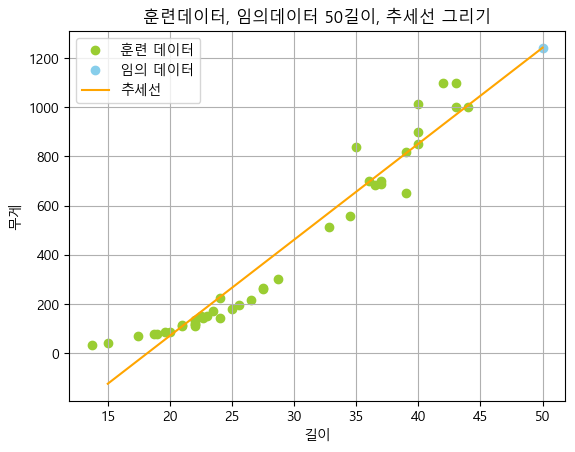

In [12]:
### 훈련 독립변수 및 종속변수로 산점도 그리기
# - 임의 데이터 길이 및 예측 무게로 산점도 그리기
# - 추세선 그리기 
plt.title("훈련데이터, 임의데이터 50길이, 추세선 그리기")

### 훈련 데이터 시각화
plt.scatter(train_input, train_target, c = "yellowgreen", label = "훈련 데이터")

### 임의 데이터 50길이 시각화
plt.scatter(50, pred[0], c = "skyblue", label = "임의 데이터")

### 추세선(예측 기준선)
# - 모델이 알아낸 기울기와 절편으로 직선 그리기
# - 사용할 x값 = 15, 50 사용
# - 사용할 y값 = ax + b = 기울기 * x값 + 절편
x = [15, 50]
y = [a*15+b, a*50+b]
plt.plot(x, y, c = "orange", label = "추세선")

# x축, y축 이름 설정
plt.xlabel("길이")
plt.ylabel("무게")

# 범례 추가
plt.legend()

# 그래프 보여주기
plt.grid()
plt.show()

In [13]:
### 해석
# - 추세선에 가까운 데이터들이 많을 수록 예측 결과가 좋은 모델이 됨
# - 추세선에서 떨어진 거리가 "오차평균"
# - 예측값이 추세선에 닿아 있으면, 예측이 잘된 것임

# - 단 y절편 값이 음수(-)인 경우에는 예측하고자 하는 값의 특성을 고려하여 판단해야 함
# - 즉, 예측하고자 하는 무게의 성격은 음수(-) 값이 나오면 안됨(무게이기 때문임)

## 결론
# - 따라서 추세선의 y절편이 음수(-)인 경우에는 음수값을 예측할 수 있는 모델이 되기에
# - 길이를 이용하여 무게를 예측하는 모델로는 "직선의 선형 모델은 부적합한 것"으로 판단됨

## 해결 방법
# - 데이터의 분포를 다시 한번 확인하여 다른 방법을 모색
# - 데이터의 산점도를 볼때 좌하양의 산점도 분포가 곡선을 나타내고 있음
# - 따라서 모델이 곡선의 방정식을 정용할 수 있도록, 특성을 2개 만들어서 새로 훈련 시키기
# - 곡선의 방정식 => ax^2 + bx + c =>> 특성 2개 : x, x^2

#### (곡선) 다항 회귀모델로 적용하기

- 다항회귀모델
    - 다항식을 사용하는 선형모델
    - 산점도의 형태가 곡선을 띄는 경우에 사용
    - 다항식(y) = ax^2 +bx + c
    - (a와 b는 기울기, c는 y절편), 다항회귀모델에서는 a, b를 계수라고 칭함
    - 기존 특성 1개의 값을 제곱한 값이 추가로 필요함 (특성 2개 사용)

In [14]:
### 제곱값 계산
# - 제곱한 값과 원래 값을 이용해서 2차원 데이터로 만들기
# - 데이터 구성 순서 : x^2이 먼저, x는 뒤에 [[x^2, x], [x^2, x] ... ]
# train_input **2

### 훈련 데이터 및 테스트 데이터 제곱한 값 추가하기 : 변수명 train_poly, test_poly
train_poly = np.column_stack((train_input **2, train_input))
test_poly = np.column_stack((test_input **2, test_input))

train_poly.shape , test_poly.shape

((42, 2), (14, 2))

#### 다항회귀 선형모델로 훈련하기

In [16]:
### 훈련모델 생성
lr = LinearRegression()

### 훈련시키기
lr.fit(train_poly, train_target)

### 훈련 및 테스트 정확도 확인
train_score = lr.score(train_poly, train_target)
test_score = lr.score(test_poly, test_target)

### 과적합 여부 확인
print(f"훈련 결정계수 : {train_score}, 테스트 결정계수 : {test_score}, 훈련 - 테스트 : {train_score - test_score}")

훈련 결정계수 : 0.9706807451768623, 테스트 결정계수 : 0.9775935108325121, 훈련 - 테스트 : -0.0069127656556498


In [19]:
### 임의 데이터 길이 50cm로 예측
pred = lr.predict([[50**2, 50]])

pred

array([1573.98423528])

In [24]:
### 추세선을 그리기 위해 모델이 알아낸 기울기와 절편 확인
# - 기울기
coef = lr.coef_
a = coef[0]
b = coef[1]

# - y 절편
c = lr.intercept_

coef , a, b, c

(array([  1.01433211, -21.55792498]),
 1.0143321093767304,
 -21.557924978837356,
 116.05021078278259)

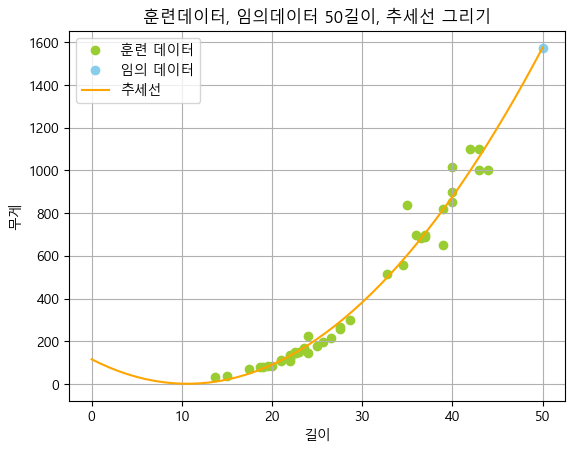

In [27]:
### 모델이 추출한 y절편 값까지 추세선 그리기
# - 곡선의 방정식에 따라 추세선은 곡선으로 그려야 함

# - 임의 데이터 길이 및 예측 무게로 산점도 그리기
# - 추세선 그리기 
plt.title("훈련데이터, 임의데이터 50길이, 추세선 그리기")

### 훈련 데이터 시각화
plt.scatter(train_input, train_target, c = "yellowgreen", label = "훈련 데이터")

### 임의 데이터 50길이 시각화
plt.scatter(50, pred[0], c = "skyblue", label = "임의 데이터")

### 추세선(예측 기준선)
# - 모델이 알아낸 기울기와 절편으로 직선 그리기
# - 사용할 x값 = 0 ~ 50 사용
# - 사용할 y값 = ax^2 + bx + c 
x = np.arange(0, 51)
y = a*x**2 + b * x + c
plt.plot(x, y, c = "orange", label = "추세선")

# x축, y축 이름 설정
plt.xlabel("길이")
plt.ylabel("무게")

# 범례 추가
plt.legend()

# 그래프 보여주기
plt.grid()
plt.show()

In [ ]:
### 해석
# - 훈련 및 테스트의 정확도의 결과로 볼 때
# - 미세하지만 과소적합이 발생함
# - 과소적합인 경우 일반적으로 모델을 사용하지는 않으나 매우 미세한 과소적합의 경우 사용하는 경우 있음
#   (일반적 개념으로 해석하면 됨)

### 과소적합 해소 방법
# 1. 데이터 양을 늘리기 : 현실적으로 수집이 가능한 경우 진행
# 2. 하이퍼 파라미터 튜닝 : 선형회귀모델은 선형방정식으로만 훈련하는 모델로 하이퍼파라메터 튜닝 대상이 없음
#                                       (튜닝 방법은 제외)
# 3. 다른 모델 사용
# - 선형회귀모델의 단점은 튜닝이 안된다는 점.
# - 이를 개선하여 나온 모델이 다중회귀모델
# - 다중회귀모델은 튜닝의 개념으로 "특성공학"의 개념을 적용
# - 특성들의 갯수(양)을 늘리는 방법으로 훈련의 복잡도를 높이는 방식을 사용함
# - 복잡도 : 특성의 양을 늘려서 학습을 어렵게 만듬(집중력을 좀 더 가하게 함)
# - 특성공학은 행단위 양을 늘리기 어려울 때 주로 사용도는 빅데이터 공학 개념

# - 다중회귀 모델 공식 = ax1 + bx2 + cx3 + .... nxn + 절편